# Lab 2: Support Vector Machines

The objective of this lab assignment is that you should get hands-on experience with implementing and using a support vector machine. 

In [53]:
from pysvm import SVM
import numpy as np
import random as r
import matplotlib.pyplot as plt
import warnings
import sklearn.datasets as dt
warnings.filterwarnings('ignore')

## 5 Generating Test Data

In [21]:

np.random.seed(100)
classA = np.concatenate(
        (np.random.randn(10,2)*0.2+[1.5,0.5],
         np.random.randn(10,2)*0.2+[-1.5,0.5])) 
classB = np.random.randn(20,2)*0.2+[0.0,-0.5]
inputs = np.concatenate(( classA , classB )) 
targets = np.concatenate (
        (np.ones(classA.shape[0]),
         -np.ones(classB.shape[0])))
N = inputs.shape[0] # Number of rows (samples)
permute=list(range(N)) 
r.shuffle(permute) 
data = inputs[permute, :]
t = targets[permute]    

#print(data[:5])
#print(t[:5])

## 6 Plotting

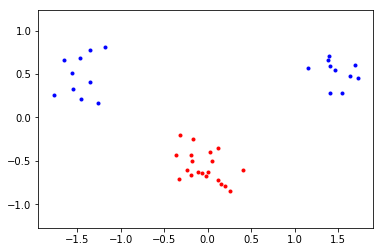

In [3]:
def plot(classA, classB):
    plt.plot([p[0] for p in classA], 
             [p[1] for p in classA], 'b.')
    plt.plot([p[0] for p in classB], 
             [p[1] for p in classB], 'r.')
    plt.axis('equal')
    #plt.savefig(’svmplot.pdf’) # Save a copy in a file
    plt.show()
plot(classA, classB)

## 7 Exploring and Reporting

### Before: Using Provided data -> linear seperable

Calculating the values of indicator function...


100%|██████████| 50/50 [00:00<00:00, 91.79it/s]


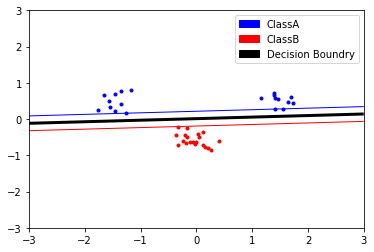

In [22]:
svm = SVM(data, t, kernel=['linear', None], slack=False)
falpha, sv = svm.optimize()
svm.plotBoundary(classA, classB) 

Calculating the values of indicator function...


100%|██████████| 50/50 [00:01<00:00, 44.01it/s]


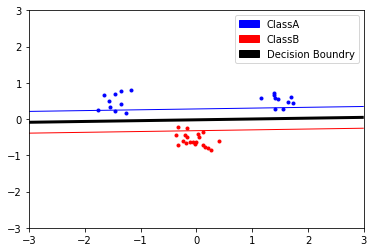

In [24]:
# SVM(data, t, kernel=['linear', None], slack=True, C=1.0)
svm = SVM(data, t, kernel=['linear', None], slack=True, C=3.0)
falpha, sv = svm.optimize()
svm.plotBoundary(classA, classB) 

### 7.1 Move the clusters around and change their sizes to make it easier or harder for the classifier to find a decent boundary. Pay attention to when the optimizer (minimize function) is not able to find a solution at all.

C=3, standard deviation= 0.1, 0.2, 0.5, 1

Calculating the values of indicator function...


100%|██████████| 50/50 [00:00<00:00, 50.25it/s]


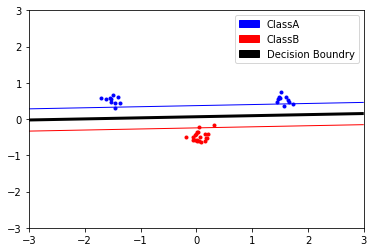

Calculating the values of indicator function...


100%|██████████| 50/50 [00:01<00:00, 41.95it/s]


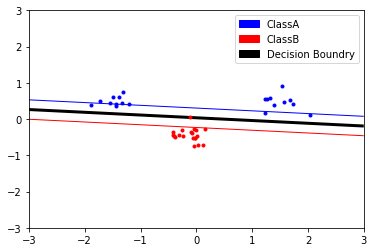

Calculating the values of indicator function...


100%|██████████| 50/50 [00:02<00:00, 19.45it/s]


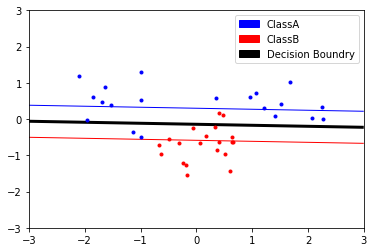

Calculating the values of indicator function...


100%|██████████| 50/50 [00:03<00:00, 13.24it/s]


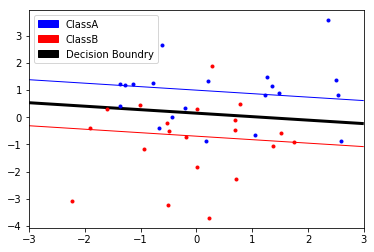

In [48]:
for st in [0.1, 0.2, 0.5, 1]:
    classA = np.concatenate(
        (np.random.randn(10,2)*st+[1.5,0.5],
         np.random.randn(10,2)*st+[-1.5,0.5])) 
    classB = np.random.randn(20,2)*st+[0.0,-0.5]
    inputs = np.concatenate(( classA , classB )) 
    targets = np.concatenate (
        (np.ones(classA.shape[0]),
         -np.ones(classB.shape[0])))
    N = inputs.shape[0] # Number of rows (samples)
    permute=list(range(N)) 
    r.shuffle(permute) 
    data = inputs[permute, :]
    t = targets[permute]
    svm = SVM(data, t, kernel=['linear', None], slack=True, C=3.0)
    falpha, sv = svm.optimize()
    svm.plotBoundary(classA, classB) 

The linear kernel cannot be able to find a solution when the given training data is not linearly separable (example is shown below)


In [25]:
def construct_dataset(classA, classB):
    data = np.concatenate([classA, classB])
    return data[:,:2], data[:,2]

In [39]:
np.random.seed(100) 
classA = np.concatenate((np.random.randn(10, 2)* 0.2 + [ 0, 0],
                        np.random.randn(10, 2)* 0.2 + [0, 0]))

classB = np.random.randn(20, 2)* 0.2 + [0.0, -0.35]

data = np.concatenate(( classA, classB ))
t = np.concatenate(
            (np.ones(classA.shape[0]),
            -np.ones(classB.shape[0])))

In [40]:
svm = SVM(data, t, kernel=['linear', None], slack=False)
falpha, sv = svm.optimize()


---------- No Solution ! ----------------



Calculating the values of indicator function...


100%|██████████| 50/50 [00:03<00:00, 15.75it/s]


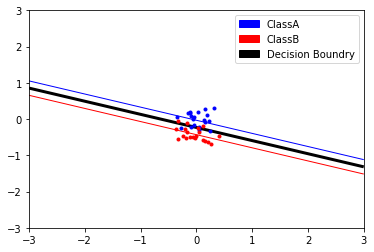

In [41]:
svm = SVM(data, t, kernel=['linear', None], slack=True, C=10)
falpha, sv = svm.optimize()
svm.plotBoundary(classA, classB) 

Calculating the values of indicator function...


100%|██████████| 50/50 [00:55<00:00,  1.12s/it]


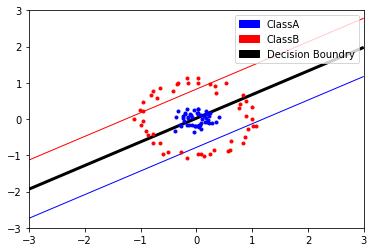

Calculating the values of indicator function...


100%|██████████| 50/50 [00:40<00:00,  1.25it/s]


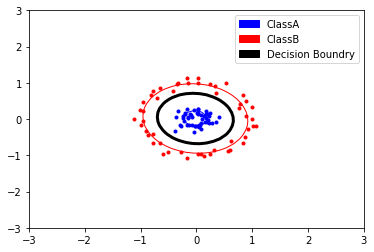

In [56]:
# Hard to be classified 
import sklearn.datasets as dt
X, Y = dt.make_circles(100, factor=0.2, noise=0.1)
classC = []
for i in range(len(X)):
    classC.append((X[i][0], X[i][1], 1 if Y[i] == 1 else -1))

classA = [a for a in classC if (a)[2] == 1]
classB = [a for a in classC if (a)[2] == -1]
data, t = construct_dataset(classA, classB)
svm = SVM(data, t, kernel=['linear', None], slack=True, C=10)
falpha, sv = svm.optimize()
svm.plotBoundary(classA, classB) 

svm = SVM(data, t, kernel=['poly', 2], slack=True, C=0.5)
falpha, sv = svm.optimize()
svm.plotBoundary(classA, classB) 

### 7.2 Implement the two non-linear kernels. You should be able to classify very hard data sets with these.

We implement RBF kernel and polynomial kernel. Details could be found in 7.3

### 7.3 The non-linear kernels have parameters; explore how they influence the decision boundary. Reason about this in terms of the bias-variance trade-off.

#### 7.3.1 RBF kernel

Low Sigma: complex decision boundary -> over fitting -> high variance low bias  
High Sigma: smooth decision boundary -> under fitting -> low variance & high bias

Calculating the values of indicator function...


100%|██████████| 50/50 [00:36<00:00,  1.38it/s]


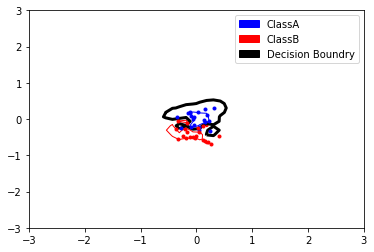

Calculating the values of indicator function...


100%|██████████| 50/50 [00:24<00:00,  2.08it/s]


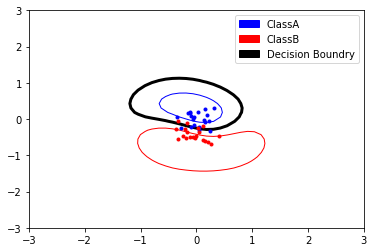

Calculating the values of indicator function...


100%|██████████| 50/50 [00:23<00:00,  2.09it/s]


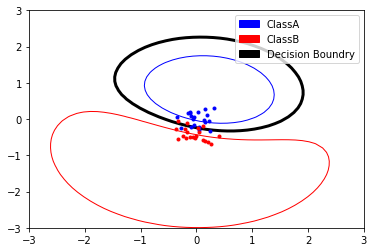

Calculating the values of indicator function...


100%|██████████| 50/50 [00:31<00:00,  1.57it/s]


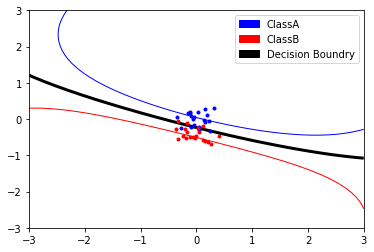

In [49]:
np.random.seed(100) 
classA = np.concatenate((np.random.randn(10, 2)* 0.2 + [ 0, 0],
                        np.random.randn(10, 2)* 0.2 + [0, 0]))

classB = np.random.randn(20, 2)* 0.2 + [0.0, -0.35]

data = np.concatenate(( classA, classB ))
t = np.concatenate(
            (np.ones(classA.shape[0]),
            -np.ones(classB.shape[0])))

for sigma in [0.1, 0.5, 1, 2]:
    svm = SVM(data, t, kernel=['rbf', sigma], slack=True, C=10)
    falpha, sv = svm.optimize()
    svm.plotBoundary(classA, classB) 

#### 7.3.2 Poly kernel

High p: complex decision boundary -> over fitting -> high variance low bias  
Low p: smooth decision boundary -> under fitting -> low variance & high bias

In [57]:
def moons_dataset(nis=None):
    X, Y = dt.make_moons(100, noise=nis)
    
    classC = []
    for i in range(len(X)):
        classC.append((X[i][0], X[i][1], 1 if Y[i] == 1 else -1))

    classA = [a for a in classC if (a)[2] == 1]
    classB = [a for a in classC if (a)[2] == -1]

    return classA, classB
classA, classB = moons_dataset()
data, t = construct_dataset(classA, classB)

Calculating the values of indicator function...


100%|██████████| 50/50 [00:47<00:00,  1.06it/s]


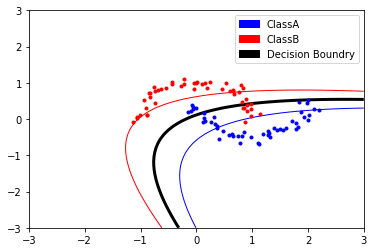

Calculating the values of indicator function...


100%|██████████| 50/50 [00:31<00:00,  1.59it/s]


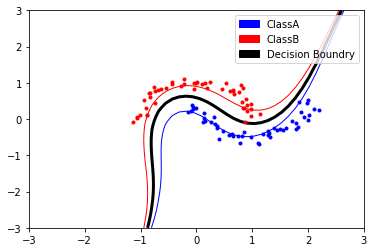

Calculating the values of indicator function...


100%|██████████| 50/50 [00:19<00:00,  2.59it/s]


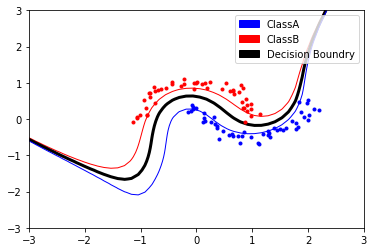

Calculating the values of indicator function...


100%|██████████| 50/50 [00:14<00:00,  3.52it/s]


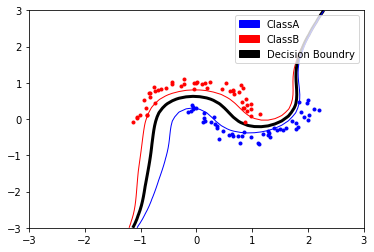

In [58]:
classA, classB = moons_dataset(nis=0.1)
data, t = construct_dataset(classA, classB)

for p in [2,3,4,5]:
    svm = SVM(data, t, kernel=['poly', p], slack=True, C=0.5)
    falpha, sv = svm.optimize()
    svm.plotBoundary(classA, classB) 

### 7.4 Explore the role of the slack parameter C. What happens for very large/small values?

C indicates the extent of how much you want to avoid misclassifying each training example. 

Small C: wider margin, much misclassification
Large C: thin margin, less misclassification -> low bias high variance

Calculating the values of indicator function...


100%|██████████| 50/50 [00:00<00:00, 72.73it/s]


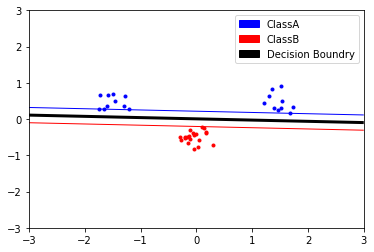

In [59]:
classA = np.concatenate(
        (np.random.randn(10,2)*0.2+[1.5,0.5],
         np.random.randn(10,2)*0.2+[-1.5,0.5])) 
classB = np.random.randn(20,2)*0.2+[0.0,-0.5]
inputs = np.concatenate(( classA , classB )) 
targets = np.concatenate (
        (np.ones(classA.shape[0]),
         -np.ones(classB.shape[0])))
N = inputs.shape[0] # Number of rows (samples)
permute=list(range(N)) 
r.shuffle(permute) 
data = inputs[permute, :]
t = targets[permute]    

svm = SVM(data, t, kernel=['linear',None], slack=False)
falpha, sv = svm.optimize()
svm.plotBoundary(classA, classB) 

Calculating the values of indicator function...


100%|██████████| 50/50 [00:00<00:00, 81.47it/s]


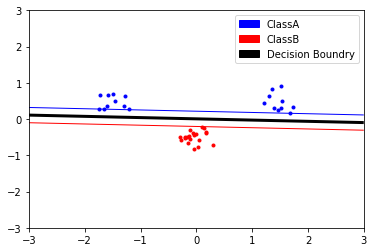

Calculating the values of indicator function...


100%|██████████| 50/50 [00:00<00:00, 64.25it/s]


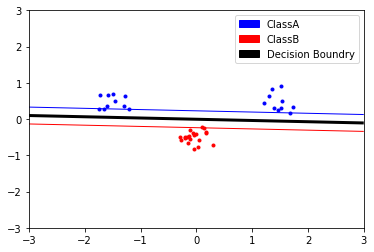

Calculating the values of indicator function...


100%|██████████| 50/50 [00:02<00:00, 21.97it/s]


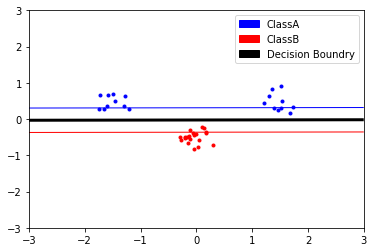

Calculating the values of indicator function...


100%|██████████| 50/50 [00:06<00:00,  7.73it/s]


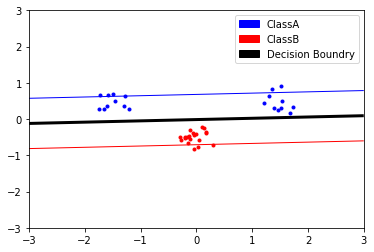

Calculating the values of indicator function...


100%|██████████| 50/50 [00:07<00:00,  7.01it/s]


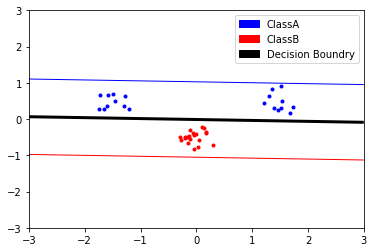

In [61]:
for c in [10e5, 10, 1, 0.1, 0.05]:
    svm = SVM(data, t, slack=True, C=c)
    falpha, sv = svm.optimize()
    svm.plotBoundary(classA, classB) 

### 7.5 Imagine that you are given data that is not easily separable. When should you opt for more slack rather than going for a more complex model (kernel) and vice versa?

We should first choose the right model, decide whether to use a simple model or a complex model. Then, according to the characteristic of datasets, we choose to change the value of slack to get a good model with high generalization

When data has many noises, we should choose a good slack rather than a more complex model, which might lead to overfitting.

In [70]:
classA = np.concatenate(
    (np.random.randn(10,2)*0.3+[1.5,0.5],
     np.random.randn(10,2)*0.3+[-1.5,0.5])) 
classB = np.random.randn(20,2)*0.3+[0.0,-0.5]
inputs = np.concatenate(( classA , classB )) 
targets = np.concatenate (
    (np.ones(classA.shape[0]),
     -np.ones(classB.shape[0])))
N = inputs.shape[0] # Number of rows (samples)
permute=list(range(N)) 
r.shuffle(permute) 
data = inputs[permute, :]
t = targets[permute]

Calculating the values of indicator function...


100%|██████████| 50/50 [00:00<00:00, 58.00it/s]


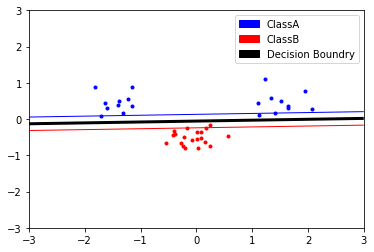

In [72]:
svm = SVM(data, t, kernel=['linear', None], slack=True, C=10.0)
falpha, sv = svm.optimize()
svm.plotBoundary(classA, classB) 

Calculating the values of indicator function...


100%|██████████| 50/50 [00:02<00:00, 19.66it/s]


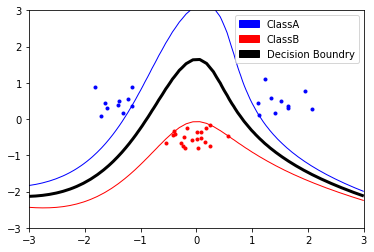

In [73]:
svm = SVM(data, t, kernel=['poly', 3], slack=False)
falpha, sv = svm.optimize()
svm.plotBoundary(classA, classB) 

When data doesn't has many noises but have an complex shape, we should choose a more complex model rather than increase slack 

In [78]:
classA, classB = moons_dataset()
data, t = construct_dataset(classA, classB)

Calculating the values of indicator function...


100%|██████████| 50/50 [00:45<00:00,  1.09it/s]


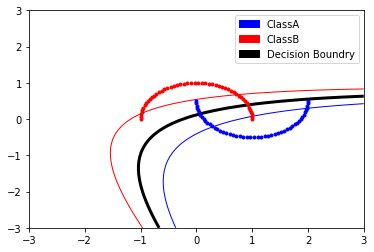

In [82]:
svm = SVM(data, t, kernel=['poly', 2], slack=True, C=1)
falpha, sv = svm.optimize()
svm.plotBoundary(classA, classB) 

Calculating the values of indicator function...


100%|██████████| 50/50 [00:40<00:00,  1.24it/s]


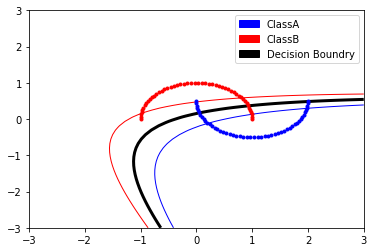

In [81]:
svm = SVM(data, t, kernel=['poly', 2], slack=True, C=10)
falpha, sv = svm.optimize()
svm.plotBoundary(classA, classB) 

Calculating the values of indicator function...


100%|██████████| 50/50 [00:15<00:00,  3.30it/s]


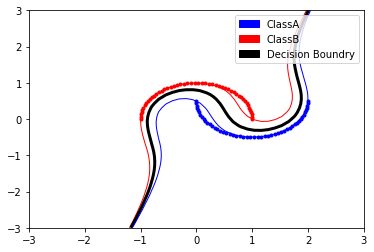

In [80]:
svm = SVM(data, t, kernel=['poly', 3], slack=True, C=1)
falpha, sv = svm.optimize()
svm.plotBoundary(classA, classB) 